<a href="https://colab.research.google.com/github/Halilibrahim-Guc/Iowa-State-University-Enrollment-Prediction-/blob/main/Iowa_Prediction_with_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

In [71]:
data = pd.read_csv("/content/ISU Enrollment Data Set.zip")

In [72]:
# Extract the total enrollment data and normalize it
total_enrollment = data["Total"].values.reshape(-1, 1)
scaler = MinMaxScaler()
total_enrollment_scaled = scaler.fit_transform(total_enrollment)


In [73]:
# Create a time series dataset with 12 months of lag
n_steps = 12
X = []
y = []
for i in range(n_steps, len(total_enrollment_scaled)):
    X.append(total_enrollment_scaled[i-n_steps:i, 0])
    y.append(total_enrollment_scaled[i, 0])
X, y = np.array(X), np.array(y)


In [74]:
# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

In [75]:
# Reshape the data for the RNN model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [76]:
# Define the RNN model architecture
rnn_model = Sequential()
rnn_model.add(SimpleRNN(64, input_shape=(n_steps, 1), activation="relu"))
rnn_model.add(Dense(1))

In [77]:
# Compile the model and specify the loss function and optimizer
rnn_model.compile(loss="mse", optimizer="adam")


In [78]:
# Train the model
rnn_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2)


Epoch 1/100
2/2 - 1s - loss: 0.4270 - 1s/epoch - 554ms/step
Epoch 2/100
2/2 - 0s - loss: 0.2974 - 12ms/epoch - 6ms/step
Epoch 3/100
2/2 - 0s - loss: 0.2258 - 12ms/epoch - 6ms/step
Epoch 4/100
2/2 - 0s - loss: 0.1624 - 13ms/epoch - 6ms/step
Epoch 5/100
2/2 - 0s - loss: 0.1143 - 13ms/epoch - 6ms/step
Epoch 6/100
2/2 - 0s - loss: 0.0835 - 12ms/epoch - 6ms/step
Epoch 7/100
2/2 - 0s - loss: 0.0663 - 13ms/epoch - 6ms/step
Epoch 8/100
2/2 - 0s - loss: 0.0686 - 11ms/epoch - 5ms/step
Epoch 9/100
2/2 - 0s - loss: 0.0565 - 11ms/epoch - 6ms/step
Epoch 10/100
2/2 - 0s - loss: 0.0387 - 12ms/epoch - 6ms/step
Epoch 11/100
2/2 - 0s - loss: 0.0251 - 11ms/epoch - 6ms/step
Epoch 12/100
2/2 - 0s - loss: 0.0187 - 12ms/epoch - 6ms/step
Epoch 13/100
2/2 - 0s - loss: 0.0129 - 20ms/epoch - 10ms/step
Epoch 14/100
2/2 - 0s - loss: 0.0087 - 15ms/epoch - 7ms/step
Epoch 15/100
2/2 - 0s - loss: 0.0052 - 14ms/epoch - 7ms/step
Epoch 16/100
2/2 - 0s - loss: 0.0030 - 15ms/epoch - 8ms/step
Epoch 17/100
2/2 - 0s - loss: 0.

In [79]:
# Evaluate the model on the test set
mse = rnn_model.evaluate(X_test, y_test, verbose=0)
print("MSE:", mse)

MSE: 0.0005216281861066818


In [80]:
# Evaluate the performance of the model on the test data using RMSE
y_pred = rnn_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: %.3f' % rmse)

1/1 [==============================] - 0s 188ms/step
RMSE: 0.023


In [81]:
# Calculate R-squared of regression model
R_square = r2_score(y_test, y_pred)
print('Coefficient of Determination', R_square)

# Calculate MAE and Mape
print(mean_absolute_error(y_test, y_pred))
print(mean_absolute_percentage_error(y_test, y_pred))

Coefficient of Determination 0.9932314977399103
0.020139347640382887
15978768717141.701


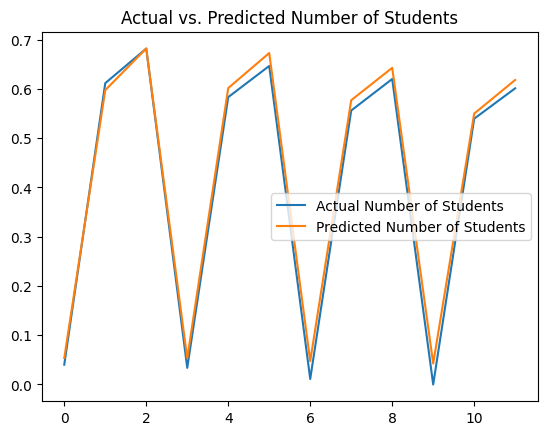

In [82]:
# Plot the predicted values against the actual values on a scatter plot
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="Actual Number of Students")
plt.plot(x_ax, y_pred, label="Predicted Number of Students")
plt.title('Actual vs. Predicted Number of Students')
plt.legend()
plt.show()